In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

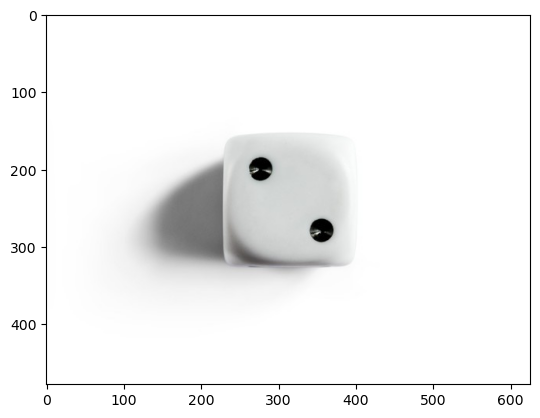

In [2]:
img = cv2.imread('img/0.jpg')

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

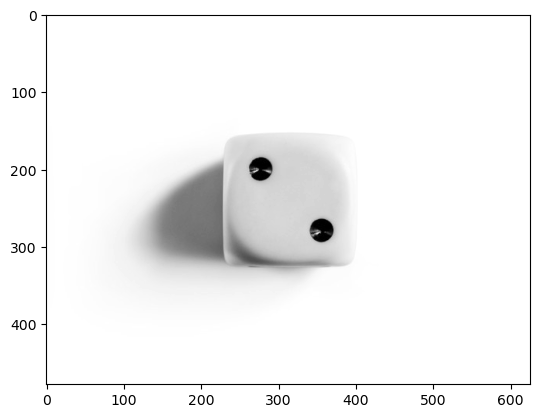

In [3]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

[[[355.85     278.85      15.67    ]
  [275.55002  198.55      15.889999]]]


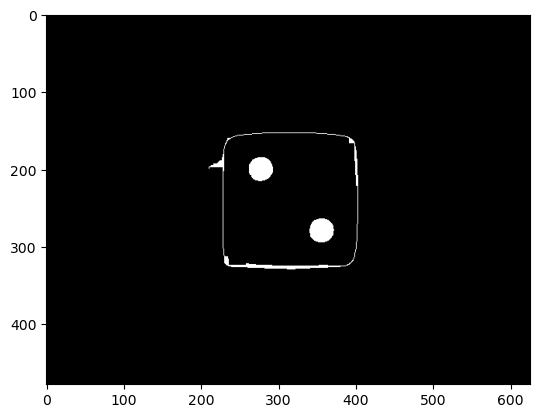

In [4]:
#edges = cv2.Canny(gray_img,15,150,0)
# blur = cv2.medianBlur(gray_img, 3)
# sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# sharpen = cv2.filter2D(gray_img, -1, sharpen_kernel)

detected_edges = cv2.Canny(gray_img,9, 150, 3)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))

#dil = cv2.dilate(detected_edges,kernel,iterations = 1)
close = cv2.morphologyEx(detected_edges, cv2.MORPH_CLOSE, kernel, iterations=2)

#close = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel)

#ret, close = cv2.threshold(close, 20, 255, cv2.THRESH_BINARY)

circles = cv2.HoughCircles(close,cv2.HOUGH_GRADIENT,1.1,20,param1=50,param2=30,minRadius=5,maxRadius=55)
print(circles)

plt.imshow(close, cmap='gray')

In [5]:
circles=circles[0,:]
print(circles)

[[355.85     278.85      15.67    ]
 [275.55002  198.55      15.889999]]


2


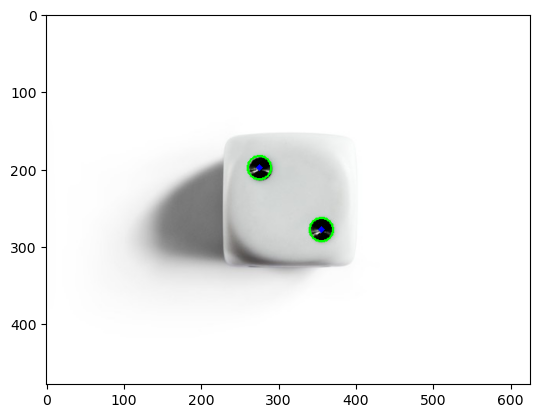

In [6]:
for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)

print(len(circles))
plt.imshow(rgb_img)
plt.show()

In [7]:
contours, hierarchy = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [8]:
print(len(contours))
print((hierarchy[0]))

1
[[-1 -1 -1 -1]]


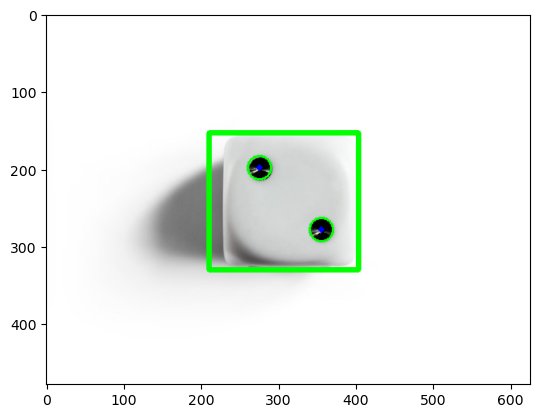

In [9]:
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(rgb_img, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

plt.imshow(rgb_img)

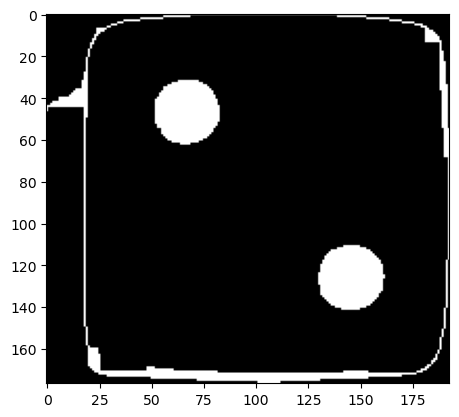

In [10]:
dice0 = close[y0:y0+h0, x0:x0+w0]

plt.imshow(dice0, cmap='gray')
plt.show()

In [11]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.3,20,param1=50,param2=30,minRadius=5,maxRadius=55)
print(len(circles0[0]))

2


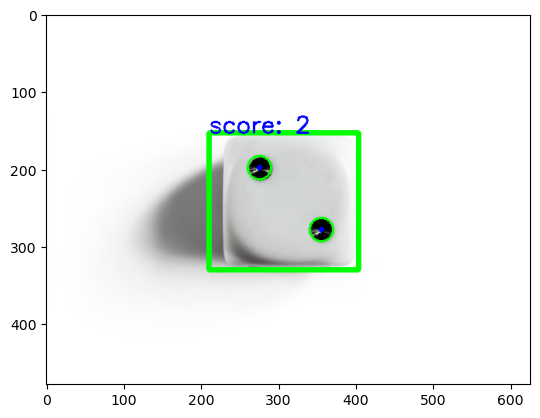

In [12]:
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(rgb_img)
plt.show()

In [13]:

#ret, thresh_img = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY)
#ret, thresh_img = cv2.adaptiveThreshold(gray_img, 255, adaptiveMethod, cv2.THRESH_BINARY , blockSize)
# ********
#blurred = cv2.GaussianBlur(gray_img, (9, 9), 0)
#thresh_img = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
# *********
#cv2.ADAPTIVE_THRESH_MEAN_C cv2.ADAPTIVE_THRESH_GAUSSIAN_C
#ret, thresh_img = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
# ------------------
# blur = cv2.medianBlur(gray_img, 5)
# sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#sharpen_kernel = np.array([[0,-1,0], [-1,4,-1], [0,-1,0]])
# sharpen = cv2.filter2D(blur, -1, sharpen_kernel)
# thresh = cv2.threshold(sharpen,170,255, cv2.THRESH_BINARY_INV)[1]
#thresh = cv2.adaptiveThreshold(sharpen, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 16)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
# ------------------
# cv2.imwrite('we.png', close)
# plt.imshow(close, cmap='gray')
# plt.show()

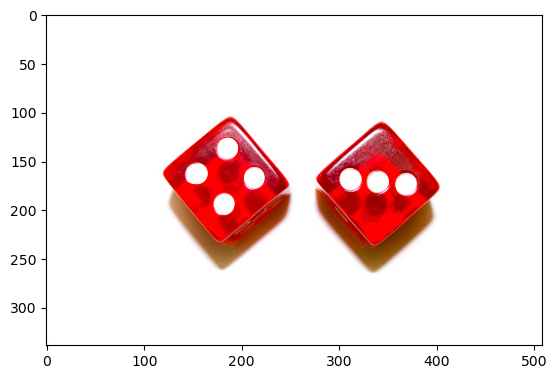

In [14]:
# 1.jpg
img = cv2.imread('img/1.jpg')

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

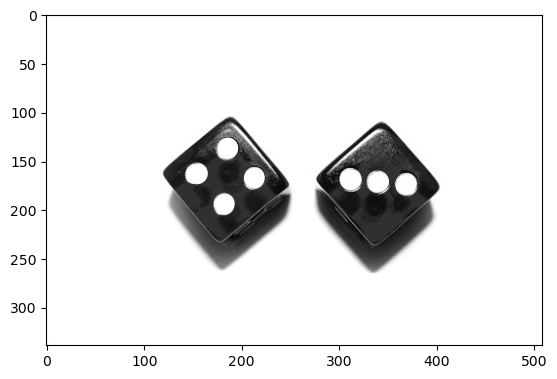

In [15]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

[[[311.40002  168.6       11.52    ]
  [153.       162.6       11.280001]
  [186.6      138.6       10.56    ]
  [213.00002  168.6       10.56    ]
  [339.       171.        10.8     ]
  [180.6      192.6       10.92    ]
  [369.       175.8       10.56    ]]]


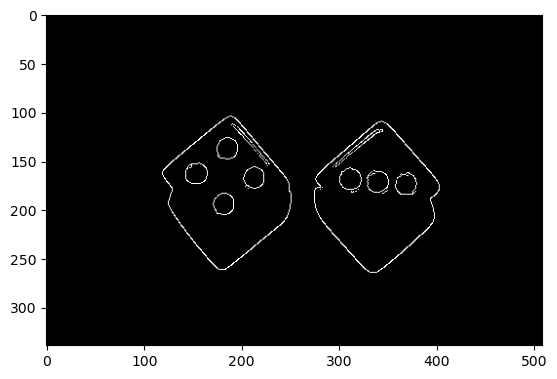

In [16]:
thresh = cv2.threshold(gray_img,220,255, cv2.THRESH_BINARY_INV)[1]


detected_edges = cv2.Canny(thresh,9, 150, 3)

#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

#dil = cv2.dilate(detected_edges,kernel,iterations = 1)
#close = cv2.morphologyEx(detected_edges, cv2.MORPH_CLOSE, kernel, iterations=1)

#close = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel)

#ret, close = cv2.threshold(close, 20, 255, cv2.THRESH_BINARY)

circles = cv2.HoughCircles(detected_edges,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(circles)

plt.imshow(detected_edges, cmap='gray')
plt.show()

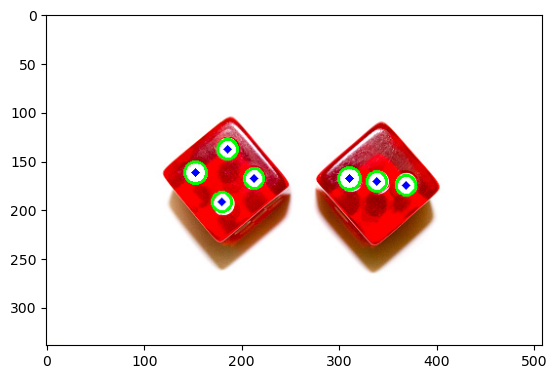

In [17]:
circles=circles[0,:]
for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)

plt.imshow(rgb_img)
plt.show()

In [18]:
contours, hierarchy = cv2.findContours(detected_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [19]:
print(len(contours))
print((hierarchy[0]))

2
[[ 1 -1 -1 -1]
 [-1  0 -1 -1]]


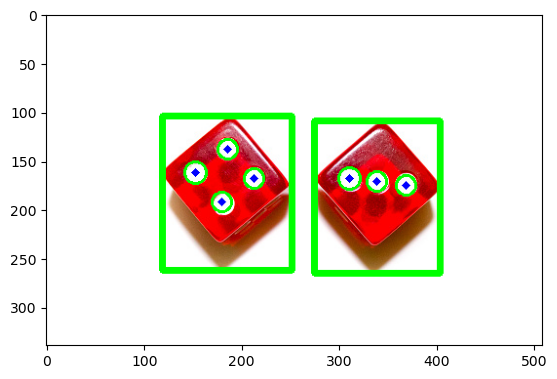

In [20]:
# since we have 2 dices and we want score of each one we need to split 'em into two image then recognise their scores.
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(rgb_img, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

x1, y1, w1, h1= cv2.boundingRect(contours[1])
cv2.rectangle(rgb_img, (x1,y1),(x1+w1,y1+h1), (0,255,0),5)


plt.imshow(rgb_img)

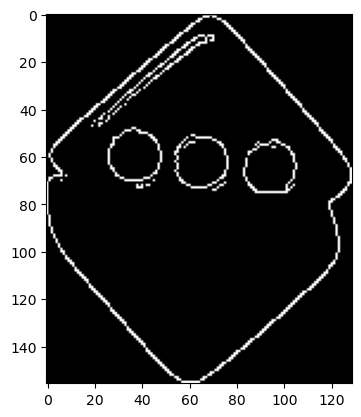

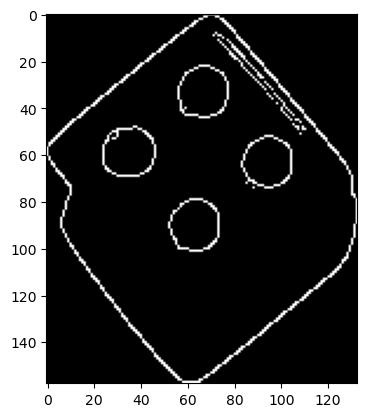

In [21]:
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]

plt.imshow(dice0, cmap='gray')
plt.show()
plt.imshow(dice1, cmap='gray')
plt.show()

In [22]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles0[0]), len(circles1[0]))

3 4


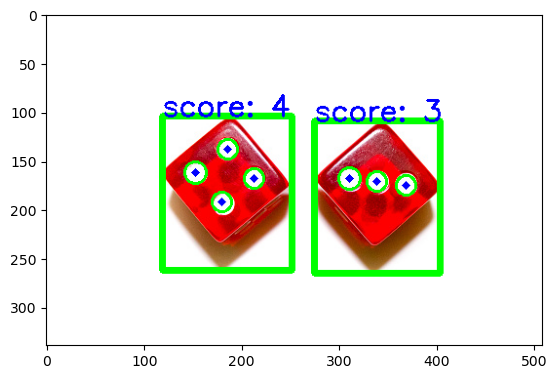

In [23]:
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(rgb_img)
plt.show()

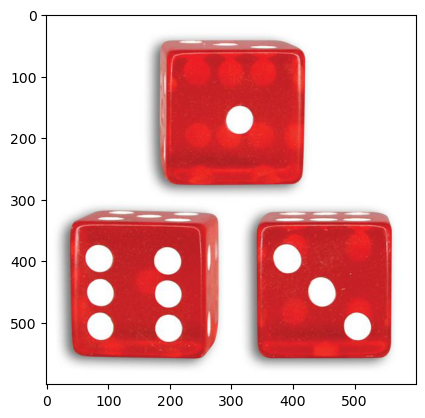

In [24]:
# 2.jpg
img = cv2.imread('img/2.jpg')

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

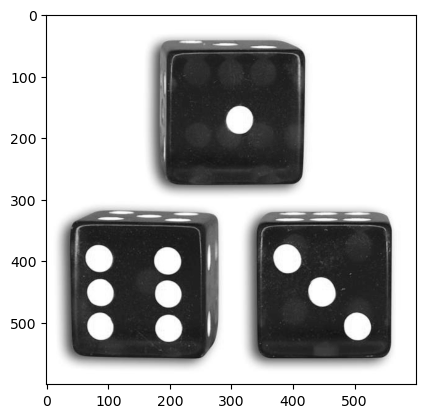

In [25]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

11


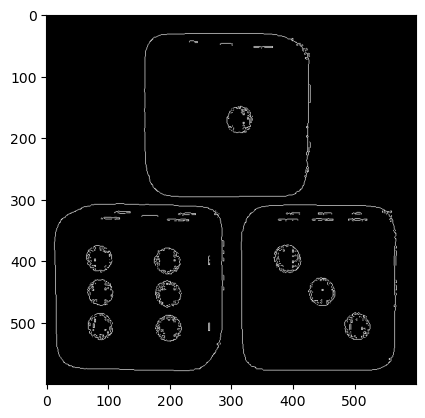

In [26]:
thresh = cv2.threshold(gray_img,250,255, cv2.THRESH_BINARY_INV)[1]


detected_edges = cv2.Canny(thresh,9, 150, 3)

#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

#dil = cv2.dilate(detected_edges,kernel,iterations = 1)
#close = cv2.morphologyEx(detected_edges, cv2.MORPH_CLOSE, kernel, iterations=1)

#close = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel)

#ret, close = cv2.threshold(close, 20, 255, cv2.THRESH_BINARY)

circles = cv2.HoughCircles(detected_edges,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles[0]))

plt.imshow(detected_edges, cmap='gray')
plt.show()

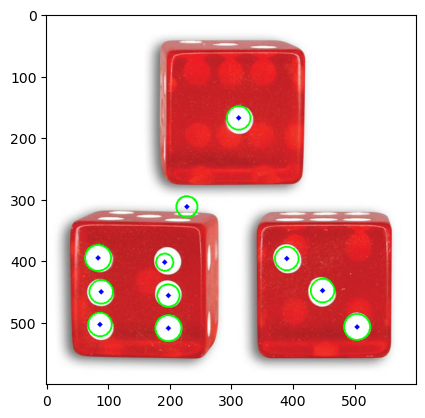

In [27]:
circles=circles[0,:]
for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)

plt.imshow(rgb_img)
plt.show()

In [28]:

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dil = cv2.dilate(detected_edges,kernel,iterations = 1)

contours, hierarchy = cv2.findContours(dil, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [29]:
print(len(contours))
print((hierarchy[0]))

3
[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [-1  1 -1 -1]]


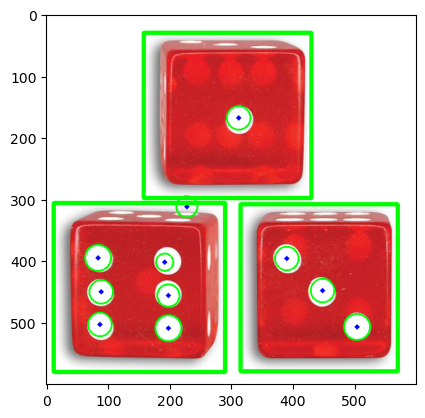

In [30]:
# since we have 3 dices and we want score of each one we need to split 'em into two image then recognise their scores.
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(rgb_img, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

x1, y1, w1, h1= cv2.boundingRect(contours[1])
cv2.rectangle(rgb_img, (x1,y1),(x1+w1,y1+h1), (0,255,0),5)

x2, y2, w2, h2= cv2.boundingRect(contours[2])
cv2.rectangle(rgb_img, (x2,y2),(x2+w2,y2+h2), (0,255,0),5)


plt.imshow(rgb_img)

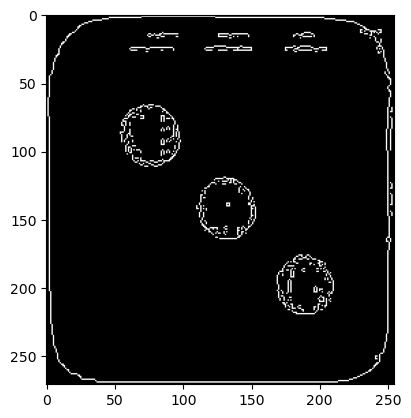

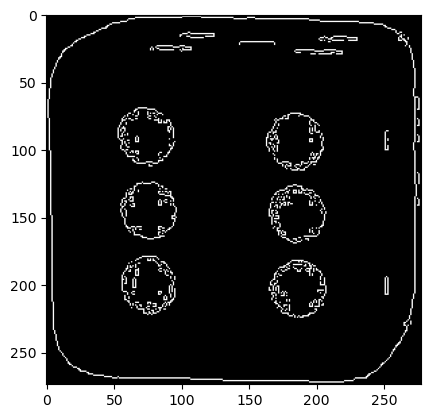

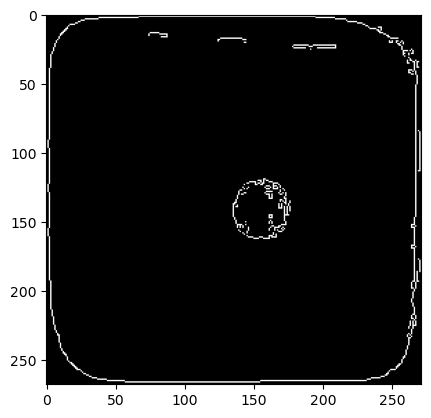

In [31]:
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]
dice2 = detected_edges[y2:y2+h2, x2:x2+w2]

plt.imshow(dice0, cmap='gray')
plt.show()
plt.imshow(dice1, cmap='gray')
plt.show()
plt.imshow(dice2, cmap='gray')
plt.show()

In [32]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles2 = cv2.HoughCircles(dice2,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles0[0]), len(circles1[0]), len(circles2[0]))

3 6 1


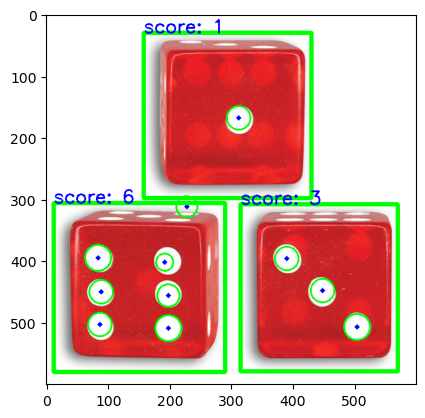

In [33]:
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles2[0])}', (x2, y2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(rgb_img)
plt.show()

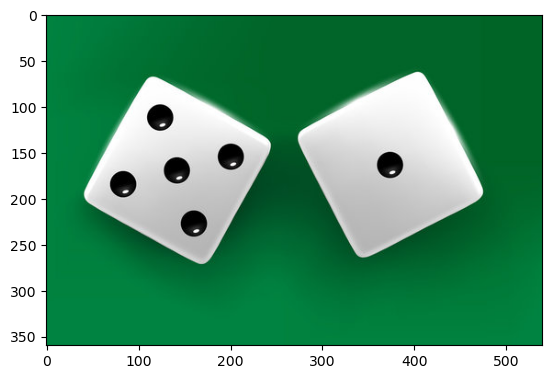

In [34]:
# 3.jpg
img = cv2.imread('img/3.jpg')

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

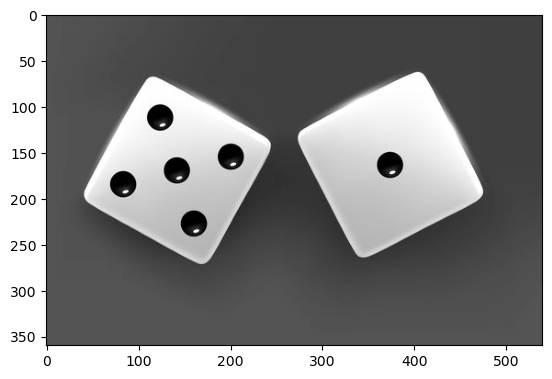

In [35]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

6


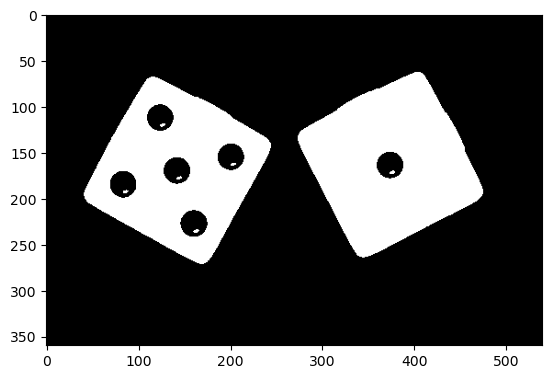

In [36]:
thresh = cv2.threshold(gray_img,150,255, cv2.THRESH_BINARY)[1]


detected_edges = cv2.Canny(thresh,9, 150, 3)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

#dil = cv2.dilate(detected_edges,kernel,iterations = 1)
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

#close = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel)

#ret, close = cv2.threshold(close, 20, 255, cv2.THRESH_BINARY)

circles = cv2.HoughCircles(close,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles[0]))

plt.imshow(close, cmap='gray')
plt.show()

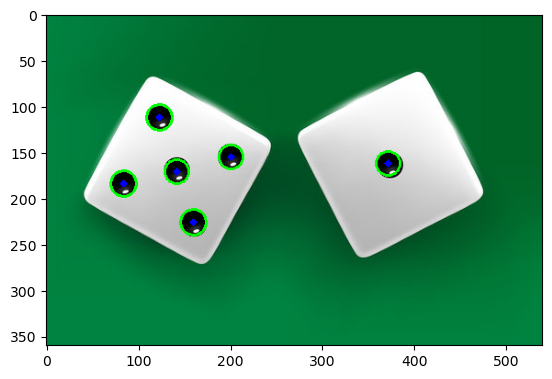

In [37]:
circles=circles[0,:]
for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)

plt.imshow(rgb_img)
plt.show()

In [38]:
contours, hierarchy = cv2.findContours(detected_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [39]:
print(len(contours))
print((hierarchy[0]))

2
[[ 1 -1 -1 -1]
 [-1  0 -1 -1]]


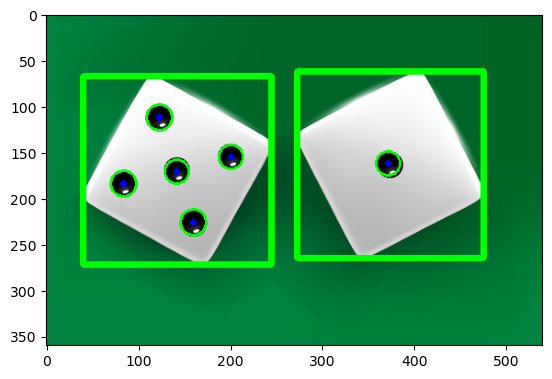

In [40]:
# since we have 2 dices and we want score of each one we need to split 'em into two image then recognise their scores.
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(rgb_img, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

x1, y1, w1, h1= cv2.boundingRect(contours[1])
cv2.rectangle(rgb_img, (x1,y1),(x1+w1,y1+h1), (0,255,0),5)


plt.imshow(rgb_img)

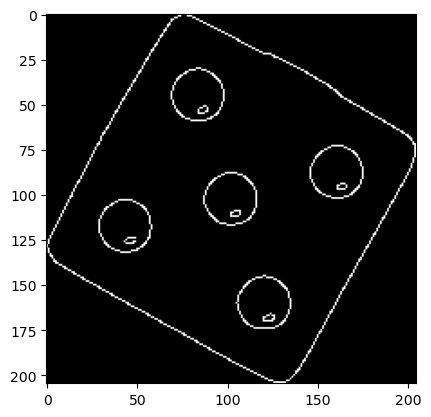

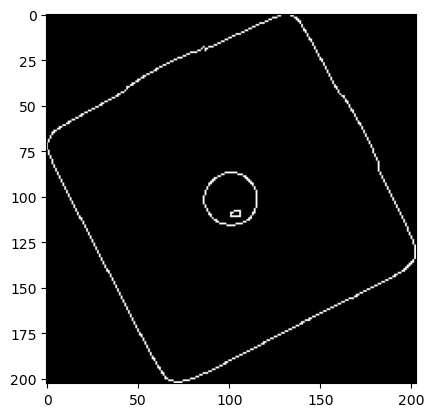

In [41]:
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]

plt.imshow(dice0, cmap='gray')
plt.show()
plt.imshow(dice1, cmap='gray')
plt.show()

In [42]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles0[0]), len(circles1[0]))

5 1


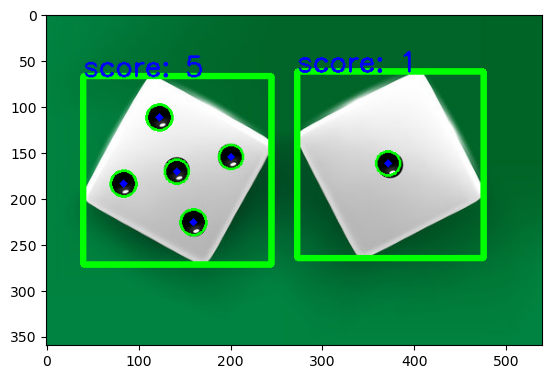

In [43]:
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(rgb_img)
plt.show()